<a href="https://colab.research.google.com/github/NikethML/houseregression/blob/main/Housing_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Package imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy


In [2]:
url='https://raw.githubusercontent.com/NikethML/houseregression/main/houseRegressionStudents%20(1)%20(1).csv'
df= pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
df.describe()

,Unnamed: 0,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,729.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.dtypes


Unnamed: 0        int64
Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 63, dtype: object

In [45]:
#df.drop(columns=['Id'],inplace=True)


In [8]:
df_categorical = df.select_dtypes(include='object')


In [9]:
df_numerical = df.select_dtypes(exclude='object')


In [16]:
df_numerical.drop(columns=['Unnamed: 0'],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
col_names=df_numerical.columns.tolist()


In [26]:
col_names

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
y_columns=col_names.pop()


In [28]:
y_columns

'SalePrice'

In [29]:
col_names

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

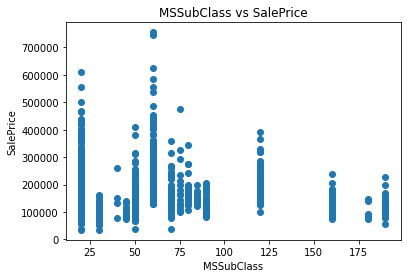

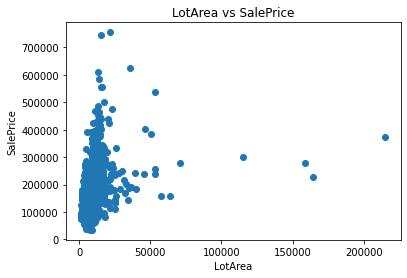

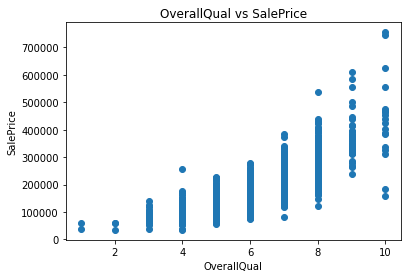

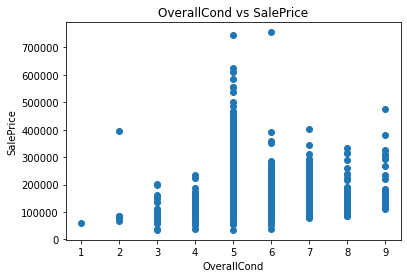

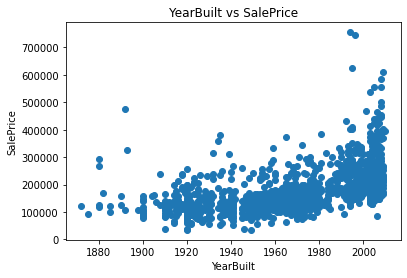

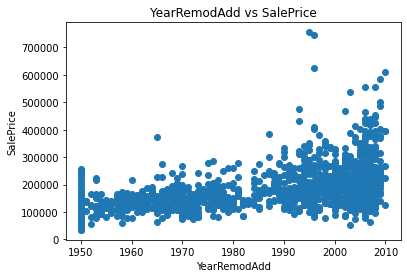

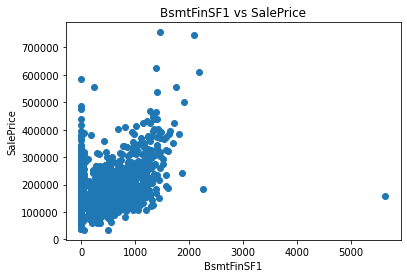

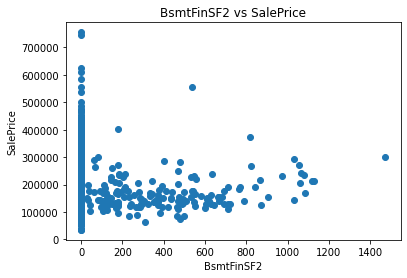

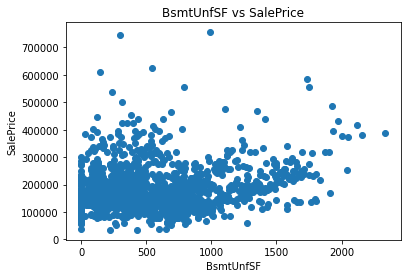

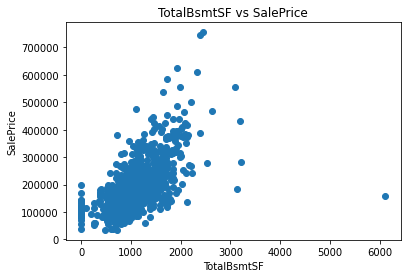

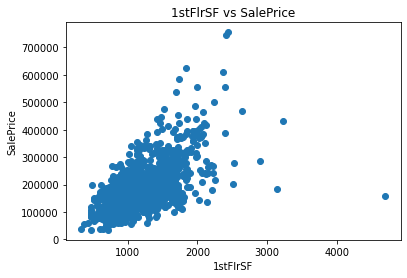

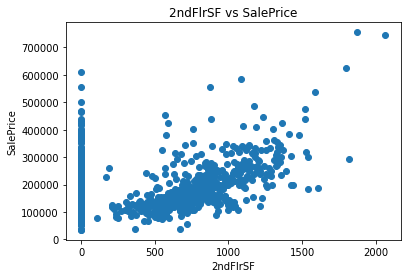

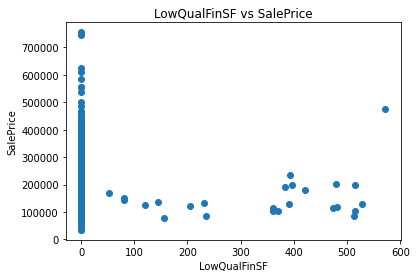

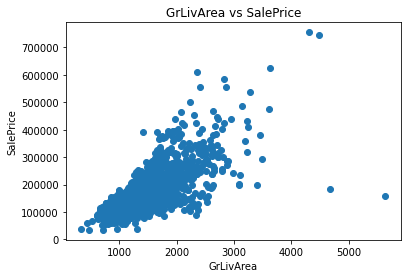

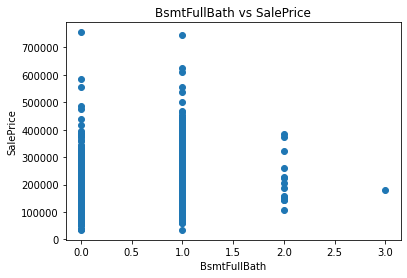

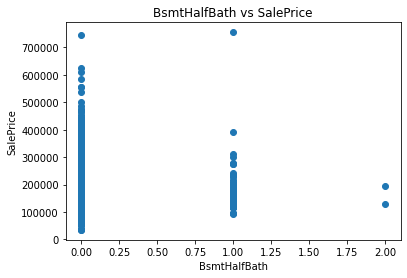

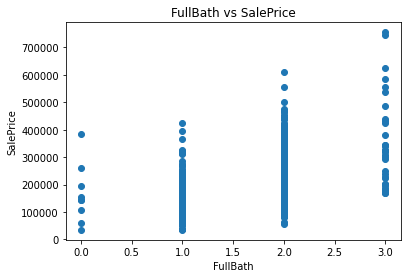

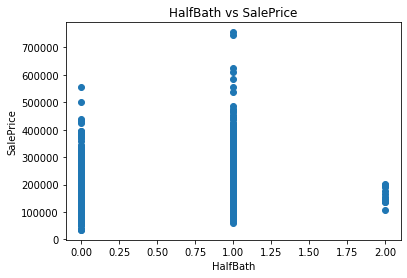

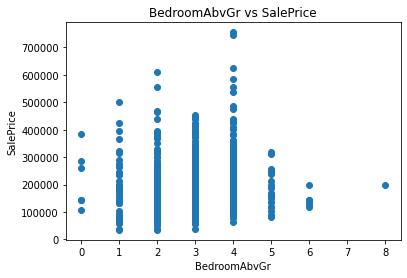

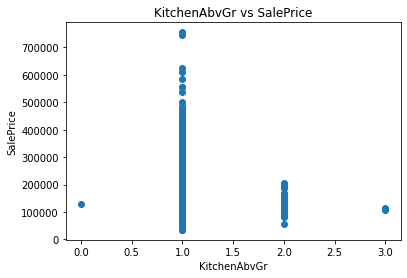

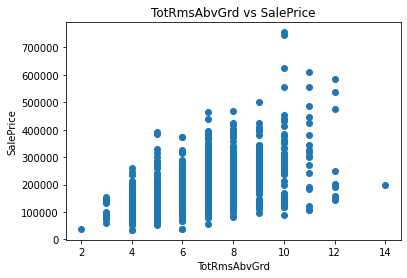

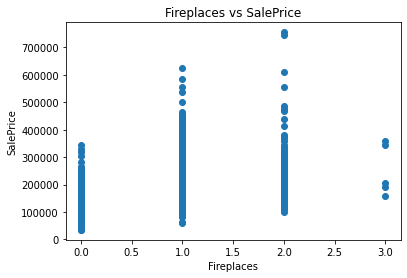

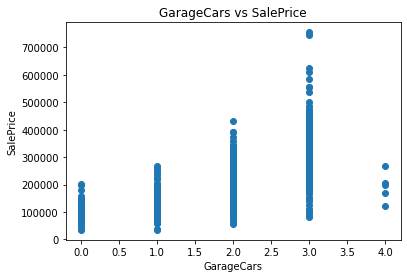

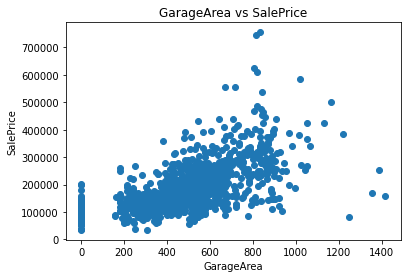

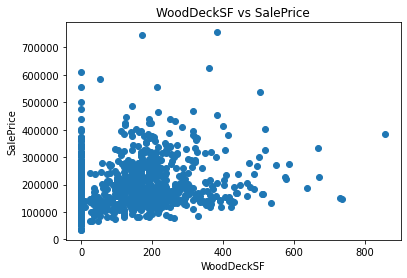

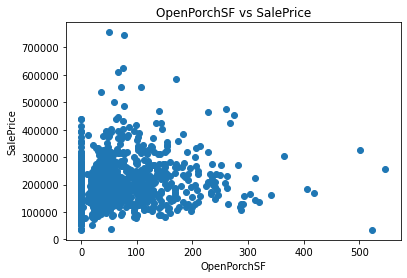

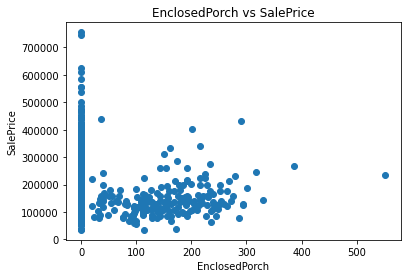

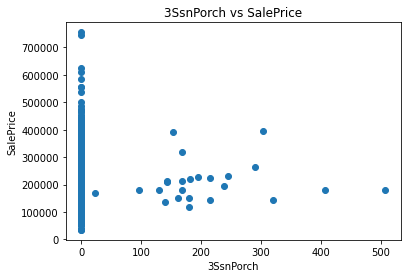

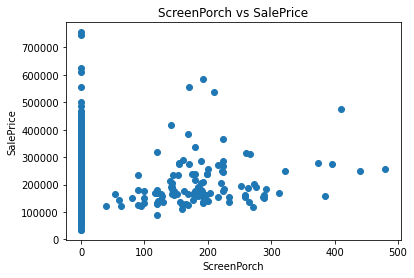

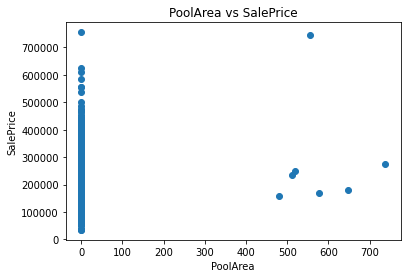

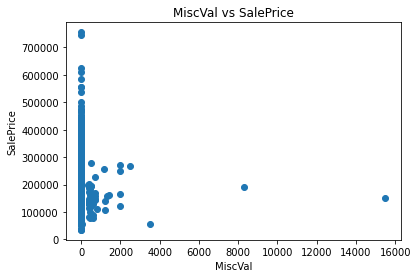

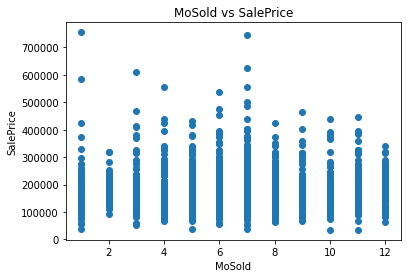

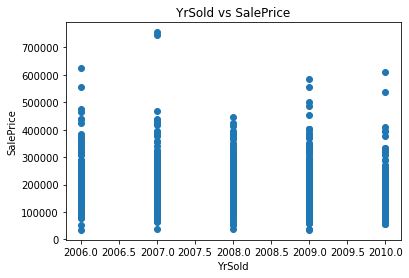

In [31]:
for x_col in col_names:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_numerical[x_col], df_numerical[y_columns])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_columns)
    ax.set_title("{} vs {}".format(x_col, y_columns))

    plt.show()

In [42]:
col_names_categorical=df_categorical.columns.tolist()
col_names_categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

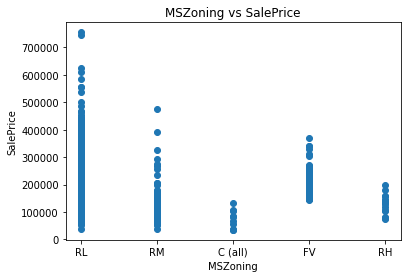

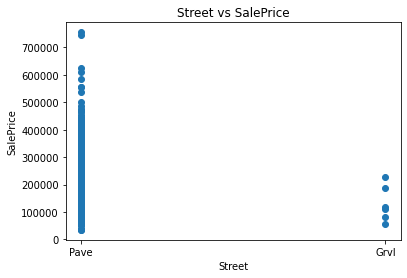

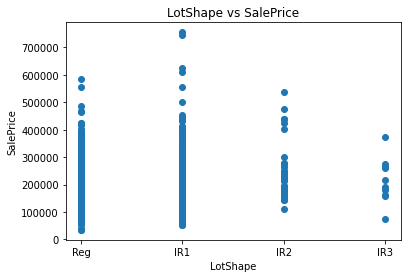

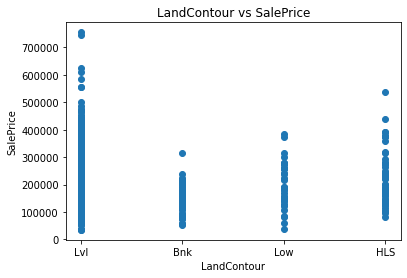

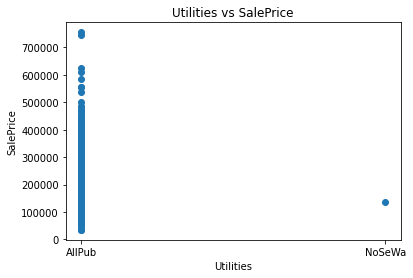

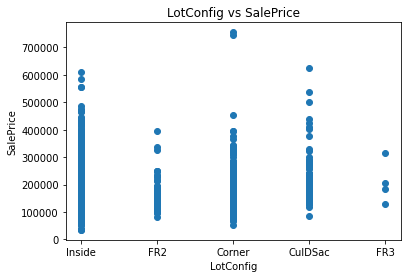

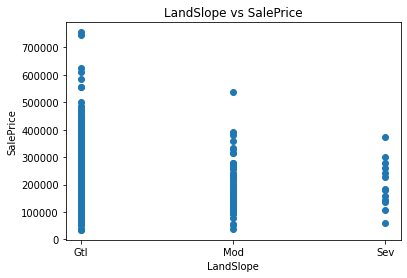

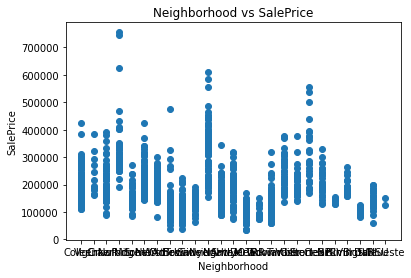

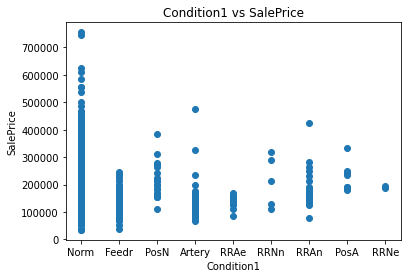

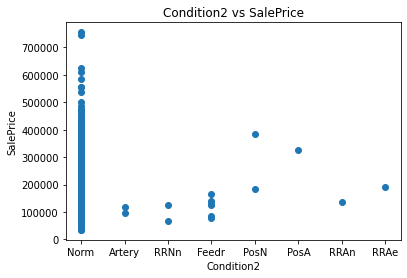

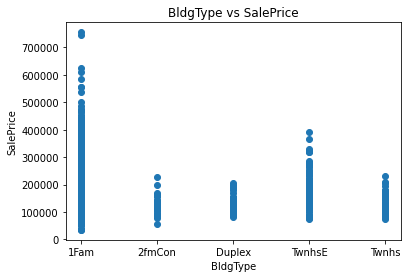

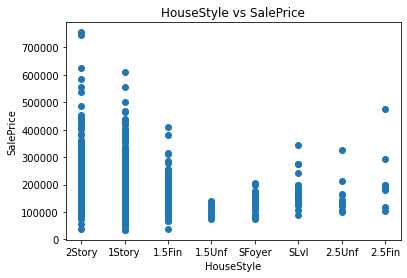

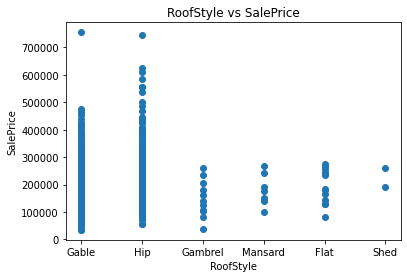

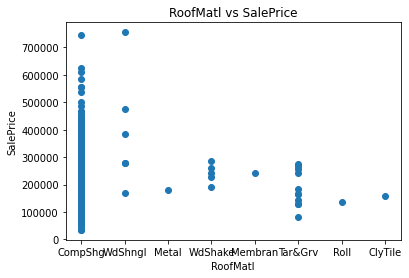

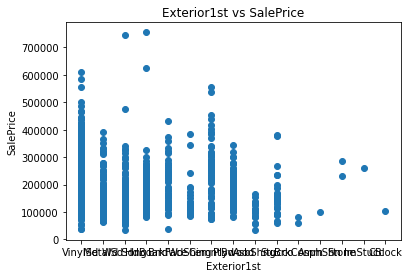

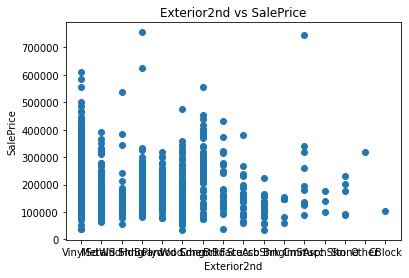

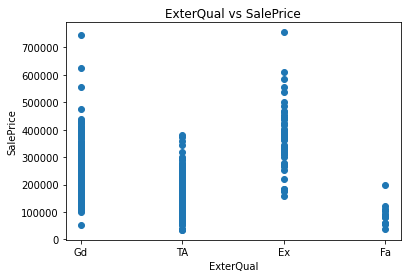

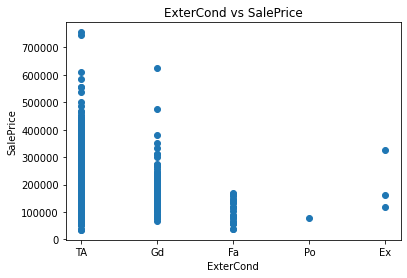

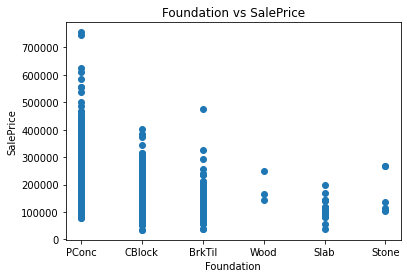

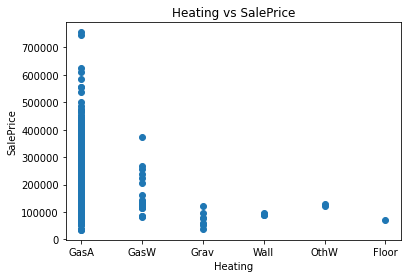

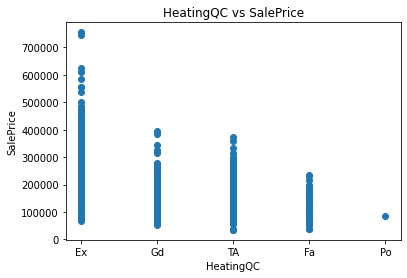

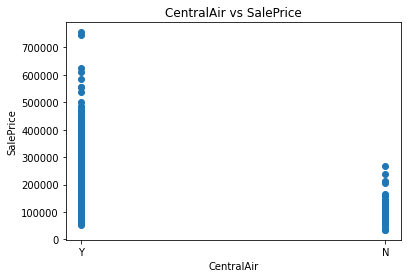

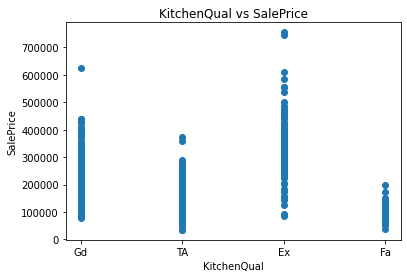

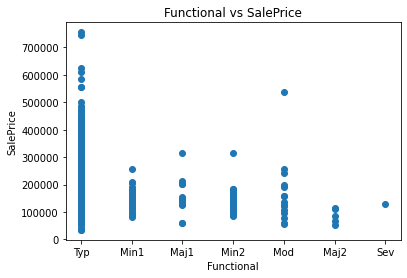

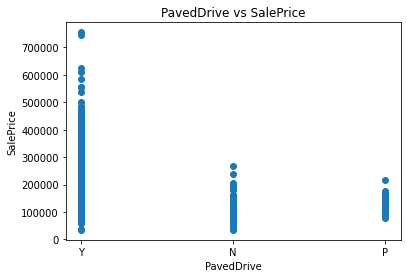

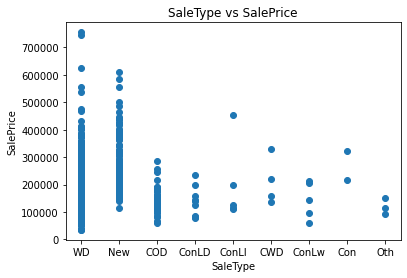

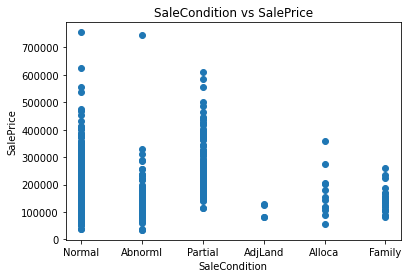

In [44]:
for x_col in col_names_categorical:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_categorical[x_col], df_numerical[y_columns])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_columns)
    ax.set_title("{} vs {}".format(x_col, y_columns))

    plt.show()

In [38]:
df_numerical.head(20)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
5,50,14115,5,5,1993,1995,732,0,64,796,...,40,30,0,320,0,0,700,10,2009,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,...,255,57,0,0,0,0,0,8,2007,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,...,235,204,228,0,0,0,350,11,2009,200000
8,50,6120,7,5,1931,1950,0,0,952,952,...,90,0,205,0,0,0,0,4,2008,129900
9,190,7420,5,6,1939,1950,851,0,140,991,...,0,4,0,0,0,0,0,1,2008,118000


In [40]:
for x_col in col_names:
  print(df_numerical[x_col].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
0       467
24       12
16        9
686     

Columns shoowing non linearity are Open deck surface and 'WoodDeckSF',
 'OpenPorchSF'

In [46]:
from sklearn.preprocessing import PolynomialFeatures


In [55]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled = sc.fit_transform(df[['WoodDeckSF', 'SalePrice']])

df_scaled=pd.DataFrame(scaled, columns =['WoodDeckSF', 'SalePrice'])
df_scaled.head()
X = np.array(df_scaled['WoodDeckSF'])
y = np.array(df_scaled['SalePrice'])
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [72]:
poly = PolynomialFeatures(degree=10, include_bias=False)


In [73]:
poly_features = poly.fit_transform(x_train.reshape(-1, 1))
poly_features_xtest=poly.fit_transform(x_test.reshape(-1, 1))

In [74]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [75]:
y_predicted = poly_reg_model.predict(poly_features_xtest)


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# model evaluation
score=r2_score(y_test,y_predicted)
print('r2 score is ',score)

r2 score is  0.090827716750702


Text(0.5, 1.0, 'Linear Regression')

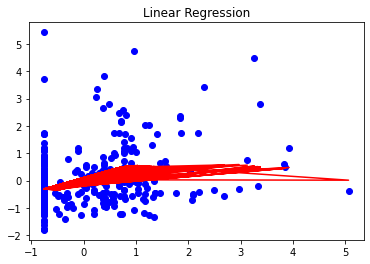

In [77]:
# Visualising the Linear Regression results
plt.scatter(x_test, y_test, color = 'blue')
  
plt.plot(x_test, y_predicted, color = 'red')
plt.title('Linear Regression')

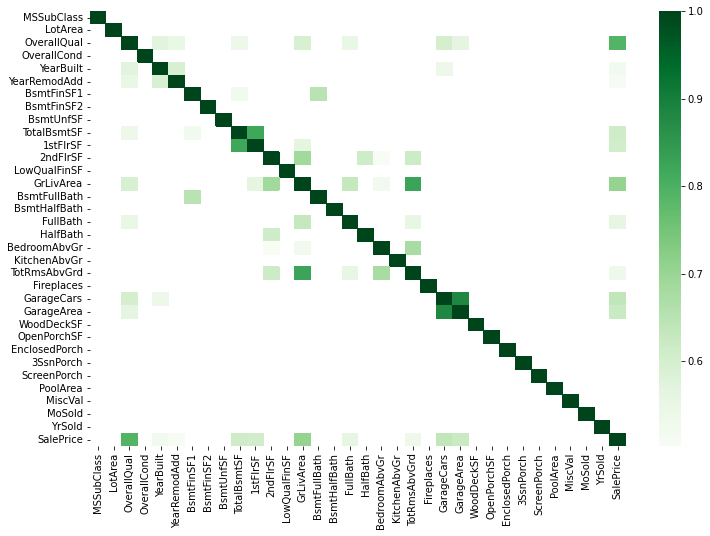

In [78]:
corr = df_numerical.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [79]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [80]:
## 'OverallQual','GrLivArea','GarageArea','TotalBsmtSF' these variables show strong correlation 

In [101]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import *
from sklearn.feature_selection import*

In [108]:
col_names=df_categorical.columns.tolist()
col_names

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [123]:
df_selectedvariables=df_categorical[['PavedDrive','ExterQual','CentralAir','Street']]

In [112]:
from sklearn.preprocessing import OneHotEncoder


# Converting type of columns to category

df_categorical=df_categorical.astype('category')
  
  

  
  


In [113]:
df_categorical.dtypes

MSZoning         category
Street           category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
ExterQual        category
ExterCond        category
Foundation       category
Heating          category
HeatingQC        category
CentralAir       category
KitchenQual      category
Functional       category
PavedDrive       category
SaleType         category
SaleCondition    category
dtype: object

In [126]:
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
  
#Passing encoded columns

enc_data=pd.DataFrame(enc.fit_transform(df_selectedvariables).toarray())

enc_data.columns=enc.get_feature_names_out()
  
#Merge with main
  

enc.get_feature_names_out()

array(['PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'ExterQual_Ex',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'CentralAir_N',
       'CentralAir_Y', 'Street_Grvl', 'Street_Pave'], dtype=object)

In [127]:
enc_data.head()

,PavedDrive_N,PavedDrive_P,PavedDrive_Y,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,CentralAir_N,CentralAir_Y,Street_Grvl,Street_Pave
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [128]:
Y=df['SalePrice']
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(enc_data, Y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
# Create linear regression object
# creating a regression model
model = LinearRegression()
  
# fitting the model
model.fit(x_train, y_train)
  
# making predictions
predictions = model.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


SyntaxError: ignored

In [132]:
df_num=df_numerical[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','SalePrice']]

In [133]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled = sc.fit_transform(df_num)

df_scaled=pd.DataFrame(scaled, columns =['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','SalePrice'])
df_scaled.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,SalePrice
0,0.651479,0.370333,0.351000,-0.459303,0.347273
1,-0.071836,-0.482512,-0.060731,0.466465,0.007288
2,0.651479,0.515013,0.631726,-0.313369,0.536154
3,0.651479,0.383659,0.790804,-0.687324,-0.515281
4,1.374795,1.299326,1.698485,0.199680,0.869843


In [137]:
X=df_scaled[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF']]
y=df_scaled['SalePrice']

In [139]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [143]:
# fitting the model
regr = LinearRegression()

regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

r2 score is  0.7824427018599805
mean_squared_error :  0.23058262245846683
mean_absolute_error :  0.3097589119301569


In [144]:
#training with categorical and numerical data

In [170]:
x_new=X.join(enc_data)

In [162]:
x_new.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,PavedDrive_N,PavedDrive_P,PavedDrive_Y,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,CentralAir_N,CentralAir_Y,Street_Grvl,Street_Pave
0,0.651479,0.370333,0.351000,-0.459303,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.071836,-0.482512,-0.060731,0.466465,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.651479,0.515013,0.631726,-0.313369,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.651479,0.383659,0.790804,-0.687324,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.374795,1.299326,1.698485,0.199680,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [148]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x_new,y , train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [149]:
# fitting the model
regr = LinearRegression()

regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

r2 score is  0.8128735774902104
mean_squared_error :  0.1983298266822947
mean_absolute_error :  0.29231058528765425


In [151]:
## Remove the Outliers

In [171]:
x_new1=x_new.join(df['SalePrice'])

In [172]:
x_new.shape

(1460, 15)

In [173]:
x_new.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'PavedDrive_N',
       'PavedDrive_P', 'PavedDrive_Y', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'CentralAir_N', 'CentralAir_Y',
       'Street_Grvl', 'Street_Pave'],
      dtype='object')

In [166]:
cols=['OverallQual', 'GrLivArea', 'GarageArea']

In [174]:
# IQR
for i in cols:
  Q1 = np.percentile(x_new1[i], 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(x_new1[i], 75,
                   interpolation = 'midpoint')
  IQR = Q3 - Q1
 
  print("Old Shape: ", x_new1.shape)
 
  # Upper bound
  upper = np.where(x_new1[i] >= (Q3+1.5*IQR))
  # Lower bound
  lower = np.where(x_new1[i] <= (Q1-1.5*IQR))
 

  x_new1.drop(upper[0], inplace = True)
  x_new1.drop(lower[0], inplace = True)
  print("New Shape: ", x_new1.shape)


Old Shape:  (1460, 16)
New Shape:  (1437, 16)
Old Shape:  (1437, 16)
New Shape:  (1412, 16)
Old Shape:  (1412, 16)
New Shape:  (1395, 16)


In [175]:
x_new1.shape

(1395, 16)

In [178]:
x_new1.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'PavedDrive_N',
       'PavedDrive_P', 'PavedDrive_Y', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'CentralAir_N', 'CentralAir_Y',
       'Street_Grvl', 'Street_Pave', 'SalePrice'],
      dtype='object')

In [179]:
X=x_new1[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'PavedDrive_N',
       'PavedDrive_P', 'PavedDrive_Y', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'CentralAir_N', 'CentralAir_Y',
       'Street_Grvl', 'Street_Pave']]
y=x_new1['SalePrice']

In [182]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X,y ,train_size = 0.75,test_size = 0.25, random_state = 100)

In [183]:
# fitting the model
regr = LinearRegression()

regr.fit(x_train, y_train)
  
# making predictions
predictions = regr.predict(x_test)
  
# model evaluation
score=r2_score(y_test,predictions)
print('r2 score is ',score)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

r2 score is  0.8336933509760769
mean_squared_error :  948756241.8311887
mean_absolute_error :  22316.548019977192
